##**SALES PREDICTION USING PYTHON**
Sales prediction involves forecasting the amount of a product that customers will purchase, taking into account various factors such as advertising expenditure, target audience segmentation, and advertising platform selection.
In businesses that offer products or services, the role of a Data Scientist is crucial for predicting future sales. They utilize machine learning techniques in Python to analyze and interpret data, allowing them to make informed decisions regarding advertising costs. By leveraging these predictions, businesses can optimize their advertising strategies and maximize sales potential. Let's embark on the journey of sales prediction using machine learning in Python.

<img src="https://digitalwoods.net/wp-content/uploads/2021/01/Sales-forecast.png" >

##***Importing Libraries***

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

##***Data Loading And Exploration***

In [ ]:
df = pd.read_csv('/content/advertising.csv')
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


##***Data Preprocessing***

###Checking for null values

In [ ]:
df.isna().values.any()

False

###Checking for outlier
Using Box Plot

<Axes: >

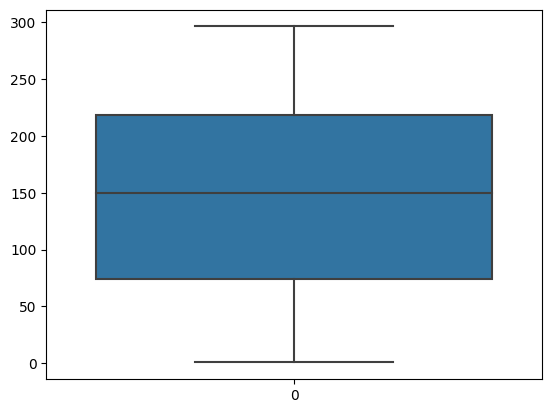

In [ ]:

sns.boxplot(df['TV'])

<Axes: >

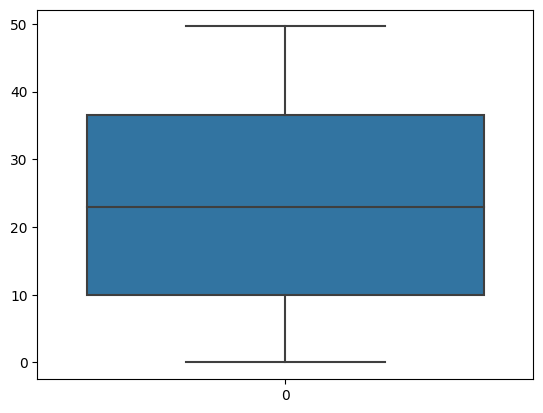

In [ ]:
sns.boxplot(df['Radio'])

<Axes: >

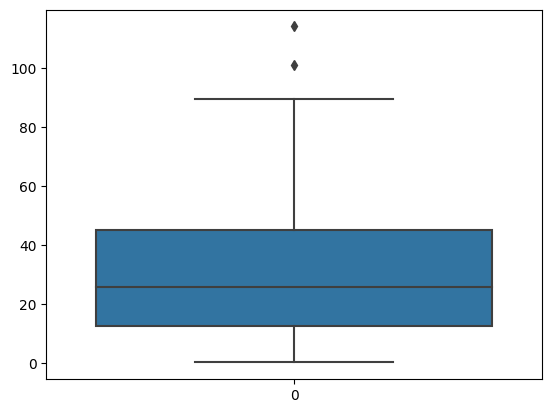

In [ ]:
sns.boxplot(df['Newspaper'])

###Handling Outliers
Using IQR Method

In [ ]:

newspaper = pd.Series(df['Newspaper'])
quarter1 = newspaper.quantile(0.25)
quarter3 = newspaper.quantile(0.75)
IQR = quarter3-quarter1
upper_limit = quarter3+1.5*IQR

outlier_index = df[(df['Newspaper'] > upper_limit)].index
cleaned_df = df.drop(outlier_index)
cleaned_df


,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


###Rechecking for Outlier

<Axes: >

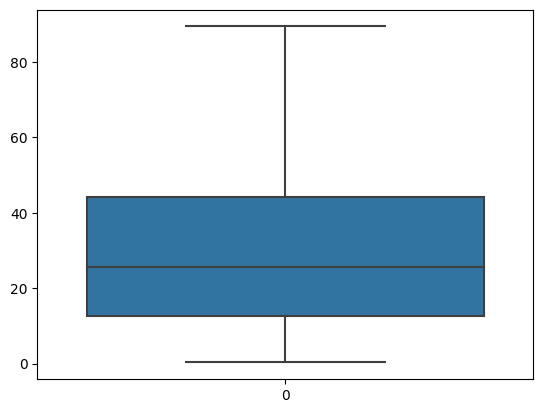

In [ ]:
sns.boxplot(cleaned_df['Newspaper'])

##***Data Visualzation***

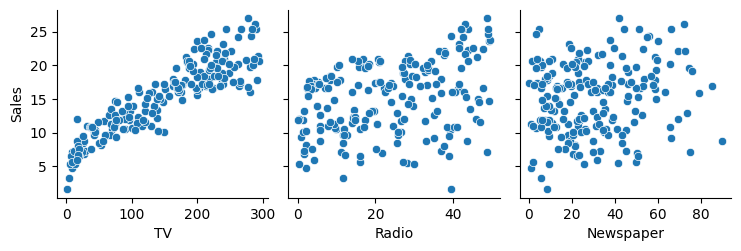

In [ ]:
sns.pairplot(cleaned_df, x_vars = ['TV','Radio','Newspaper'],y_vars= ['Sales'])

### Data preparation form modeling training

In [ ]:
x_data = cleaned_df.drop('Sales', axis = 1)
y_data = cleaned_df['Sales']
print(x_data, y_data)

        TV  Radio  Newspaper
0    230.1   37.8       69.2
1     44.5   39.3       45.1
2     17.2   45.9       69.3
3    151.5   41.3       58.5
4    180.8   10.8       58.4
..     ...    ...        ...
195   38.2    3.7       13.8
196   94.2    4.9        8.1
197  177.0    9.3        6.4
198  283.6   42.0       66.2
199  232.1    8.6        8.7

[198 rows x 3 columns] 0      22.1
1      10.4
2      12.0
3      16.5
4      17.9
       ... 
195     7.6
196    14.0
197    14.8
198    25.5
199    18.4
Name: Sales, Length: 198, dtype: float64


###Spliting Data into train and test data

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.3, random_state=5)

## ***Model Training using Linear Regression***

In [ ]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

##***Testing Model***

In [ ]:
x_test_prediction = model.predict(x_test)
print(x_test_prediction)
print("\nAccuracy Score: ", r2_score(y_test,x_test_prediction))

[ 8.23004248  8.37975497 18.28766834 21.49919508  6.43751177 18.01752654
 20.60989153 11.46373361 10.43341181  9.83918792 11.68601528 21.05191693
  7.33571252 17.92934338  8.27480619  7.48107545 17.35601448 18.16585925
  7.69798156 12.4353895  13.69980382 19.61657808 20.72936199 17.90967577
 22.07447677 12.22496329 17.31057673 10.83516671 14.29975756 17.24304029
 15.69710069 17.29608839 16.98148464 10.39657966 11.40350014 20.8941611
  7.45286778 15.50566133 11.20768975 19.49038288 11.36037208 13.57283611
  9.8311401  10.83727718  9.65531835 11.41669798 17.57504528  9.79701937
 13.26676355 21.87709504 10.90464787 21.49524596  8.98307362 18.26958059
 13.95240281 22.15000353  8.13254149 21.33030283 19.44758376  9.2056201 ]

Accuracy Score:  0.9068317469475251
